<a href="https://colab.research.google.com/github/AMShipx/30-Days-Of-Python/blob/master/Copia_de_Curso_RM_Simulador_Espectro_de_resonancia%2C_Curva_T1_y_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Advertencia : NO MODIFICAR EL CODIGO, GENERE UNA COPIA**.


#**Solo apretar el simbolo ▶**

##**Funciones**

In [ ]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

###**Curvas T1 y T2**

In [ ]:
def mz(T1):
  MZ=[]
  for t in range(5000):
    mZ=100*(1-exp(-t/T1))
    MZ.append(mZ)
  return MZ

def mxy(T2):
  MXY=[]
  for t in range(5000):
    mXY=100*exp(-t/T2)
    MXY.append(mXY)
  return MXY

###**Curvas TR Y TE**

In [ ]:
def Tiempo_repeticion(TR,T1):
    MZ=[]
    for t in range(TR):
        mZ=100*(1-exp(-t/T1))
        MZ.append(mZ)
    return MZ

def Tiempo_eco(TE,T2):
    MXY=[]
    for t in range(TE):
        mXY=100*exp(-t/T2)
        MXY.append(mXY)
    return MXY

###**Potenciacion**

In [ ]:
def Tiempo_eco_POP(MZ,TE,T2):
    MXY=[]
    for t in range(TE):
        mXY=MZ*exp(-t/T2)
        MXY.append(mXY)
    return MXY

def Tiempo_eco_continuo(MZ,TE,T2):
    MXY=[]
    rango = TE + 100
    for t in range(rango):
        mXY=MZ*exp(-t/T2)
        MXY.append(mXY)
    return MXY

###**Valores T1 y T2 de los tejidos en 1,5T y 3 T**

In [ ]:
#Valores t1 en 1,5 y 3 T.
Valores_t1 = {"Grasa" : [290,360],
              "Musculo" : [870,1420],
                  "Sust. Blanca" : [790,1100],
                  "Sust. Gris" : [920,1600],
                  "LCR" : [2650,3800],
                  "Higado": [500,800],
              "cartilago": [1060,1240],
              "Sangre" :[1400,1900]}

#Valores t2 en 1,5 y 3 T.
Valores_t2 = {"Grasa" : [160,130],
              "Musculo" : [60,30],
                  "Sust. Blanca" : [90,60],
                  "Sust. Gris" : [100,80],
                  "LCR" : [2500,2300],
                  "Higado": [50,40],
              "cartilago": [42,37],
              "Sangre" :[290,275]}

Localizacion_Valores= {"0":"Grasa",
                          "1":"Musculo",
                          "2":"Sust. Blanca",
                          "3":"Sust. Gris",
                          "4":"LCR",
                          "5":"Higado",
                          "6":"cartilago",
                          "7":"Sangre"}

##**Graficos**

###**FID**

####**Fid vs t2**

In [ ]:
def fid_grafico_t2():
  def calculate_fid(t, t2):
      fid = np.exp(-t / t2) * np.sin(2 * np.pi * 60 * t)
      return fid

  def plot_fid(t2):
      t = np.linspace(0, 1, 1000)
      fid = calculate_fid(t, t2)
      fig, ax = plt.subplots()
      ax.plot(t, fid)
      ax.set_xlabel("Time (s)")
      ax.set_ylabel("FID")
      plt.show()

  t2_slider = widgets.FloatSlider(
      value=0.5,
      min=0.01,
      max=1.0,
      step=0.01,
      description="T2:",
      readout_format=".2f",
  )

  output = widgets.Output()

  def on_value_change(change):
      with output:
          output.clear_output()
          plot_fid(change.new)

  t2_slider.observe(on_value_change, names="value")


  display(t2_slider, output)



####**fid_vs_frecuencia**

In [ ]:
def fid_grafico_frec():
  def calculate_fid(t, f):
      fid = np.exp(-t / 0.5) * np.sin(2 * np.pi * f * t)
      return fid

  def plot_fid(f):
      t = np.linspace(0, 1, 1000)
      fid = calculate_fid(t,f)
      fig, ax = plt.subplots()
      ax.plot(t, fid)
      ax.set_xlabel("Time (s)")
      ax.set_ylabel("FID")
      plt.show()

  f_slider = widgets.FloatSlider(
      value=0.5,
      min=0.01,
      max=100,
      step=0.01,
      description="Frecuencia:",
      readout_format=".2f",
  )

  output = widgets.Output()

  def on_value_change(change):
      with output:
          output.clear_output()
          plot_fid(change.new)

  f_slider.observe(on_value_change, names="value")


  display(f_slider, output)



###**Curvas t1 y t2 valores libres**

In [ ]:
def curva_t1_libre():
  T1_A = int(input("ingrese el T1 en ms , del tejido A: "))
  T1_B = int(input("ingrese el T1 en ms , del tejido B: "))
  mz_t1_A = mz(T1_A)
  mz_t1_B = mz(T1_B)

  plt.plot(mz_t1_A, label="Tejido_A")
  plt.plot(mz_t1_B, label="Tejido_B")
  plt.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  plt.xlim(0, (xlm + 2000))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T1" )
  plt.legend(loc=4)

  plt.text(T1_A,63,"63%")
  plt.text(T1_B,63,"63%")

  # Mostrarlo.
  plt.show()

def curva_t2_libre():
  T2_A = int(input("ingrese el T2 en ms , del tejido A: "))
  T2_B = int(input("ingrese el T2 en ms , del tejido B: "))

  plt.plot(mxy(T2_A), label="Tejido_A")
  plt.plot(mxy(T2_B), label="Tejido_B")
  plt.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.
  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  plt.xlim(0, (xlm + 100))
  plt.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('tiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T2")
  plt.legend(loc=1)

  plt.text(T2_A,37,"37%")
  plt.text(T2_B,37,"37%")

  # Mostrarlo.
  plt.show()


###**Curvas t1 y t2 segun tejido**

In [ ]:
def curva_t1_tejido():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]


  plt.plot(mz(T1_A), label=Localizacion_Valores[tejido_escogido_A])
  plt.plot(mz(T1_B), label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  plt.xlim(0, (xlm+2000))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T1, comparacion de tejidos"  )
  plt.legend(loc=4)

  plt.text(T1_A,63,"63%")
  plt.text(T1_B,63,"63%")

  # Mostrarlo.
  plt.show()

def curva_t2_tejido():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]

  plt.plot(mxy(T2_A), label=Localizacion_Valores[tejido_escogido_A])
  plt.plot(mxy(T2_B), label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  plt.xlim(0, (xlm + 100))
  plt.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('ttiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T2, comparacion de tejidos" )
  plt.legend(loc=1)

  plt.text(T2_A,37,"37%")
  plt.text(T2_B,37,"37%")

  # Mostrarlo.
  plt.show()


###**Curvas T1 y T2 segun Tejido, en 1,5T y 3T**

In [ ]:
def curva_t1_tesjale():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido]][1]


  plt.plot(mz(T1_A), label="1,5 T")
  plt.plot(mz(T1_B), label="3 T")
  plt.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  plt.xlim(0, (xlm+1000))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T1, comparacion entre 1,5 T y 3 T")
  plt.legend(loc=4)

  plt.text(T1_A,63,"63%")
  plt.text(T1_B,63,"63%")

  # Mostrarlo.
  plt.show()

def curva_t2_tesjale():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido]][1]

  plt.plot(mxy(T2_A), label="1,5 T")
  plt.plot(mxy(T2_B), label="3 T")
  plt.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  plt.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  plt.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  plt.xlim(0, (xlm + 100))
  plt.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('tiempo en ms')

  plt.savefig("output.png")
  plt.title("curva T2, comparacion entre 1,5 T y 3 T" )
  plt.legend(loc=1)

  plt.text(T2_A,37,"37%")
  plt.text(T2_B,37,"37%")

  # Mostrarlo.
  plt.show()

###**Curva T1/TR y T2/TE**

In [ ]:
def curva_t1_TR():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)

  plt.plot(mz(T1_A), label=Localizacion_Valores[tejido_escogido_A])
  plt.plot(tiempo_de_repeticion_A, 'g',linewidth=2)
  plt.hlines(y=tiempo_de_repeticion_A[-1], xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  plt.plot(mz(T1_B), label=Localizacion_Valores[tejido_escogido_B])
  plt.plot(tiempo_de_repeticion_B,'g',linewidth=2)
  plt.hlines(y=tiempo_de_repeticion_B[-1], xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="g",linestyle='-.',label = "TR")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TR + 1000))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo de repeticion_ms')

  plt.savefig("output.png")
  plt.title("curva T1 en funcion del Tiempo de Repeticion" )
  plt.legend(loc=4)
  plt.figure(figsize=(10, 10))

  # Mostrarlo.
  plt.show()


def curva_t2_TE():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  Tiempo_de_eco_A = Tiempo_eco(TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco(TE,T2_B)


  plt.plot(mxy(T2_A), label=Localizacion_Valores[tejido_escogido_A])
  plt.plot(Tiempo_de_eco_A, 'g',linewidth=2)
  plt.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  plt.plot(mxy(T2_B), label=Localizacion_Valores[tejido_escogido_B])
  plt.plot(Tiempo_de_eco_B,'g',linewidth=2)
  plt.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="g",linestyle='-.',label = "TE")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TE + 300))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('tiempo de eco_ms')

  plt.savefig("output.png")
  plt.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  plt.legend(loc=1)


  # Mostrarlo.
  plt.show()

In [ ]:
def curva_TR_TE():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)

  Ultimo_valor_A = tiempo_de_repeticion_A[-1]
  Ultimo_valor_B = tiempo_de_repeticion_B[-1]

  plt.plot(mz(T1_A), 'k',linewidth=1, linestyle=':')
  plt.plot(tiempo_de_repeticion_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  plt.hlines(y=Ultimo_valor_A, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  plt.plot(mz(T1_B), 'k',linewidth=1, linestyle=':')
  plt.plot(tiempo_de_repeticion_B,linewidth=2,label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=Ultimo_valor_B, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="k",label = "TR")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TR + 200))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo de repeticion_ms')

  plt.savefig("output.png")
  plt.title("curva T1 en funcion del Tiempo de Repeticion" )
  plt.text(TR,90,"& vMXY")
  plt.legend(loc=4)
  plt.figure(figsize=(10, 10))

  # Mostrarlo.
  plt.show()

  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  Tiempo_de_eco_A = Tiempo_eco_POP(Ultimo_valor_A,TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco_POP(Ultimo_valor_B,TE,T2_B)
  Tiempo_eco_continuo_A = Tiempo_eco_continuo(Ultimo_valor_A,TE,T2_A)
  Tiempo_eco_continuo_B = Tiempo_eco_continuo(Ultimo_valor_B,TE,T2_B)


  plt.plot(Tiempo_eco_continuo_A, 'k',linewidth=1, linestyle=':')
  plt.plot(Tiempo_de_eco_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  plt.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  plt.plot(Tiempo_eco_continuo_B, 'k',linewidth=1, linestyle=':')
  plt.plot(Tiempo_de_eco_B,linewidth=2, label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="k",label = "TE")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TE + 50))
  if Ultimo_valor_A > Ultimo_valor_B:
    xlm = Ultimo_valor_A
  elif Ultimo_valor_A < Ultimo_valor_B:
    xlm = Ultimo_valor_A
  # Limitar los valores de los ejes.

  plt.ylim(0, (xlm + 10))
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('tiempo de eco_ms')

  plt.savefig("output.png")
  plt.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  plt.legend(loc=1)


  # Mostrarlo.
  plt.show()


###**Potenciacion**

In [ ]:
def curva_TR_TE():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)

  Ultimo_valor_A = tiempo_de_repeticion_A[-1]
  Ultimo_valor_B = tiempo_de_repeticion_B[-1]

  plt.plot(mz(T1_A), 'k',linewidth=1, linestyle=':')
  plt.plot(tiempo_de_repeticion_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  plt.hlines(y=Ultimo_valor_A, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  plt.plot(mz(T1_B), 'k',linewidth=1, linestyle=':')
  plt.plot(tiempo_de_repeticion_B,linewidth=2,label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=Ultimo_valor_B, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="k",label = "TR")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TR + 200))
  plt.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMZ')
  plt.xlabel('tiempo de repeticion_ms')

  plt.savefig("output.png")
  plt.title("curva T1 en funcion del Tiempo de Repeticion" )
  plt.text(TR,90,"& vMXY")
  plt.legend(loc=4)
  plt.figure(figsize=(10, 10))

  # Mostrarlo.
  plt.show()

  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  Tiempo_de_eco_A = Tiempo_eco_POP(Ultimo_valor_A,TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco_POP(Ultimo_valor_B,TE,T2_B)
  Tiempo_eco_continuo_A = Tiempo_eco_continuo(Ultimo_valor_A,TE,T2_A)
  Tiempo_eco_continuo_B = Tiempo_eco_continuo(Ultimo_valor_B,TE,T2_B)


  plt.plot(Tiempo_eco_continuo_A, 'k',linewidth=1, linestyle=':')
  plt.plot(Tiempo_de_eco_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  plt.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  plt.plot(Tiempo_eco_continuo_B, 'k',linewidth=1, linestyle=':')
  plt.plot(Tiempo_de_eco_B,linewidth=2, label=Localizacion_Valores[tejido_escogido_B])
  plt.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  plt.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="k",label = "TE")

  # Establecer el color de los ejes.

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  # Limitar los valores de los ejes.

  plt.xlim(0, (TE + 50))
  if Ultimo_valor_A > Ultimo_valor_B:
    xlm = Ultimo_valor_A
  elif Ultimo_valor_A < Ultimo_valor_B:
    xlm = Ultimo_valor_B

  plt.ylim(0, (xlm + 10))
  # Guardar gráfico como imágen PNG.

  plt.ylabel('% vMXY')
  plt.xlabel('tiempo de eco_ms')

  plt.savefig("output.png")
  plt.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  plt.legend(loc=1)


  # Mostrarlo.
  plt.show()

  if Tiempo_de_eco_A[-1] > Tiempo_de_eco_B[-1]:
    print(Localizacion_Valores[tejido_escogido_A],"tiene mas señal que ",Localizacion_Valores[tejido_escogido_B])
    print("La diferencia de señal entre los tejidos es de ", (Tiempo_de_eco_A[-1]-Tiempo_de_eco_B[-1]))
  elif Tiempo_de_eco_A[-1] < Tiempo_de_eco_B[-1]:
    print(Localizacion_Valores[tejido_escogido_B],"tiene mas señal que ",Localizacion_Valores[tejido_escogido_A])
    print("La diferencia de señal entre los tejidos es de ", (Tiempo_de_eco_B[-1]-Tiempo_de_eco_A[-1]))

###**Grafico dominio temporal vs frecuencia entre la grasa y el agua**

In [ ]:
def dominio_temporal_vs_frecuencial():

  #Selection molecular subtype
  testaje = {"a":1, "b":1.5,"c":3}
  print(testaje)
  tesla = testaje[input("indique el valor del campo magnetico: ")]
  # definir los parámetros de resonancia del agua y la grasa
  if tesla == 1:
    freq_A = 42 # MHz
    freq_G = 30 # MHz
  elif tesla == 1.5:
    freq_A = 63 # MHz
    freq_G = 43 # MHz
  elif tesla == 3:
    freq_A = 126 # MHz
    freq_G = 80 # MHz

  phase_offset = np.pi/2  # Desplazamiento de fase (en radianes)
    # Definir los parámetros de la señal
  t = np.linspace(0, 1, 1000)  # Tiempo de adquisición

  # Generar la señal

  signal_A= np.sin(2 * np.pi * freq_A * t + phase_offset)
  signal_G= np.sin(2 * np.pi * freq_G * t + phase_offset)
  # Crear la figura
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))

  # Graficar la señal en el dominio del tiempo
  ax1.plot(t, signal_A)
  ax1.plot(t, signal_G)
  ax1.set_xlabel("Tiempo (s)")
  ax1.set_ylabel("Amplitud")
  ax1.set_title("Dominio del tiempo")

  # Graficar la transformada de Fourier de la señal
  fft_A = np.fft.fft(signal_A)
  fft_G = np.fft.fft(signal_G)
  freqsA = np.fft.fftfreq(len(signal_A))
  freqsG = np.fft.fftfreq(len(signal_G))
  ax2.plot(freqsA, np.abs(fft_A), label='Agua')
  ax2.plot(freqsG, np.abs(fft_G), label='Grasa')
  ax2.set_xlim(0, 0.15)
  ax2.set_xlabel("Frecuencia (MHz)")
  ax2.set_ylabel("Amplitud")
  ax2.set_title("Transformada de Fourier")

  # Mostrar la figura
  plt.tight_layout()
  plt.legend()
  plt.show()


###**Grafico frecuencia vs campo magnetico**

In [ ]:
def fre_vs_cm():
  # definir los parámetros de resonancia segun campo magnetico
  resonancia_campo_magnetico_1 = 50

  # crear datos de frecuencia
  frecuencia = np.linspace(0, 10, 1000)

  # calcular las amplitudes
  amplitud_1 = np.zeros_like(frecuencia)
  for i, f in enumerate(frecuencia):
      amplitud_1[i] = np.exp(-(f-resonancia_campo_magnetico_1)**2 / (2*0.1**2)) # usando la fórmula de la distribución normal

  # crear slider para cambiar el valor de la frecuencia de resonancia
  slider = widgets.FloatSlider(value=resonancia_campo_magnetico_1, min=0, max=10, step=0.1, description='Campo Magnetico', readout_format='.1f')

  # función para actualizar los datos y graficarlos
  def update_plot(change):
      resonancia_campo_magnetico_1 = change.new
      amplitud_1 = np.zeros_like(frecuencia)
      for i, f in enumerate(frecuencia):
          amplitud_1[i] = np.exp(-(f-resonancia_campo_magnetico_1)**2 / (2*0.1**2)) # usando la fórmula de la distribución normal
      plt.plot(frecuencia, amplitud_1, label=(str(resonancia_campo_magnetico_1) + " MHz"))
      plt.title('Relacion entre campo magnetico y frecuencia de precesion')
      plt.xlabel('Frecuencia (MHz)')
      plt.ylabel('Amplitud')
      plt.legend()
      plt.show()

  # conectar la función de actualización con el slider
  slider.observe(update_plot, 'value')

  # mostrar el slider
  display(slider)

###**Grafico frecuencia vs apantallamiento**

In [ ]:
def fre_vs_apantallamiento():
  # definir los parámetros de resonancia segun campo magnetico
  resonancia_apantallamiento = 50

  # crear datos de frecuencia
  frecuencia = np.linspace(0, 10, 1000)

  # calcular las amplitudes
  amplitud_1 = np.zeros_like(frecuencia)
  for i, f in enumerate(frecuencia):
      amplitud_1[i] = np.exp(-(f-resonancia_apantallamiento)**2 / (2*0.1**2)) # usando la fórmula de la distribución normal

  # crear slider para cambiar el valor de la frecuencia de resonancia
  slider = widgets.FloatSlider(value=resonancia_apantallamiento, min=0, max=10, step=0.1, description='APANTALLAMIENTO', readout_format='.1f')

  # función para actualizar los datos y graficarlos
  def update_plot(change):
      resonancia_apantallamiento = change.new
      amplitud_1 = np.zeros_like(frecuencia)
      for i, f in enumerate(frecuencia):
          amplitud_1[i] = np.exp(-(f-resonancia_apantallamiento)**2 / (2*0.1**2)) # usando la fórmula de la distribución normal
      plt.plot(frecuencia, amplitud_1, label=(str(resonancia_apantallamiento) + " MHz"))
      plt.title('Relacion entre apantallamiento y frecuencia de resonancia')
      plt.xlabel('Frecuencia (MHz)')
      plt.ylabel('Amplitud')
      plt.legend()
      # invertir el eje x
      plt.gca().invert_xaxis()
      plt.show()

  # conectar la función de actualización con el slider
  slider.observe(update_plot, 'value')

  # mostrar el slider
  display(slider)

###**Grafico desplazamiento quimico vs campo magnetico**

In [ ]:
def desplamiento_quimico_vs_cm():
  #Selection molecular subtype
  testaje = {"a":1, "b":1.5,"c":3}
  print(testaje)
  tesla = testaje[input("indique el valor del campo magnetico: ")]
  # definir los parámetros de resonancia del agua y la grasa
  if tesla == 1:
    resonancia_agua = 4.2 # MHz
    resonancia_grasa = 3 # MHz
  elif tesla == 1.5:
    resonancia_agua = 6.3 # MHz
    resonancia_grasa = 4.3 # MHz
  elif tesla == 3:
    resonancia_agua = 12.6 # MHz
    resonancia_grasa = 8 # MHz

  # crear datos de frecuencia
  frecuencia = np.linspace(0, 20, 1000)

  # calcular las amplitudes correspondientes para el agua y la grasa
  amplitud_agua = np.zeros_like(frecuencia)
  amplitud_grasa = np.zeros_like(frecuencia)
  for i, f in enumerate(frecuencia):
      amplitud_agua[i] = np.exp(-(f-resonancia_agua)**2 / (2*0.1**2)) # usando la fórmula de la distribución normal
      amplitud_grasa[i] = np.exp(-(f-resonancia_grasa)**2 / (2*0.1**2)) # usando la fórmula de la distribución norma

  # graficar los datos
  plt.plot(frecuencia, amplitud_agua, label='Agua')
  plt.plot(frecuencia, amplitud_grasa, label='Grasa')
  plt.xlabel('Frecuencia (MHz)')
  plt.ylabel('Amplitud')
  plt.title('Distribución de Resonancia del Agua y la grasa a '+ str(tesla) + " tesla")
  plt.legend()
  plt.show()

#**Experimento**

##**Analisis curva de distribucion de frecuencias**

###**FID y la transformada de fourier**

En resonancia magnética, la FID (Free Induction Decay) se refiere a la señal de voltaje que se produce después de que se ha aplicado un pulso de radiofrecuencia a un objeto sometido a un campo magnético fuerte. La FID representa la desexcitación de los núcleos de hidrógeno que han sido excitados por el pulso de radiofrecuencia, y se utiliza para generar la imagen de resonancia magnética.

La FID es una señal transitoria que decae con el tiempo debido a la relajación de los núcleos de hidrógeno en el objeto bajo estudio. La señal FID se convierte en una señal digital mediante un proceso llamado digitalización, y luego se utiliza para generar la imagen de resonancia magnética mediante el procesamiento de la señal digital.

In [ ]:
#presiona play y modifica la frecuencia
fid_grafico_frec()

NameError: ignored

¿De que depende esta variacion de la frecuencia?

La transformada de Fourier es una herramienta matemática utilizada para convertir señales en el dominio temporal (señales de tiempo) en señales en el dominio de la frecuencia. La transformada de Fourier permite descomponer una señal en sus componentes frecuenciales, lo que permite analizar las diferentes frecuencias que componen la señal.

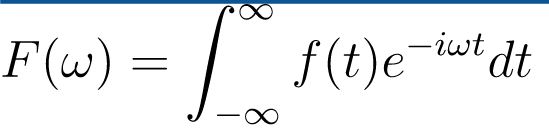

F(ω) es la función de frecuencia continua resultante de la transformada.
f(t) es la función de tiempo continuo que se desea transformar.
ω es la frecuencia angular.

{'a': 1, 'b': 1.5, 'c': 3}
indique el valor del campo magnetico: a


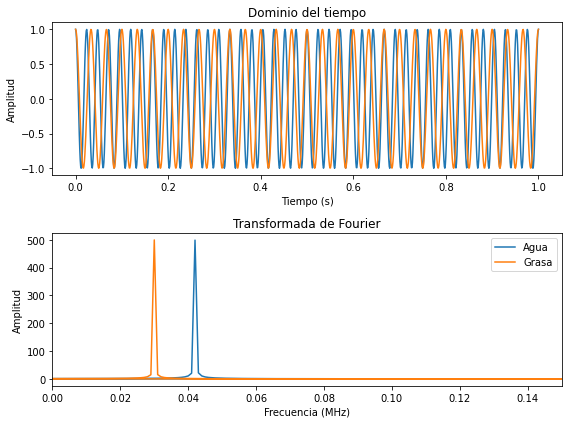

In [ ]:
#presiona play y selecciona la intensidad del campo magnetico
dominio_temporal_vs_frecuencial()

###**Frecuencia vs apantallamiento magnetico**

Observamos que al modificar los valores del apantallamiento algo sucede con la frecuencia de resonancia, ¿cual seria su relacion, inversa o directamente proporcional? Discutan y expliquen.

FloatSlider(value=10.0, description='APANTALLAMIENTO', max=10.0, readout_format='.1f')

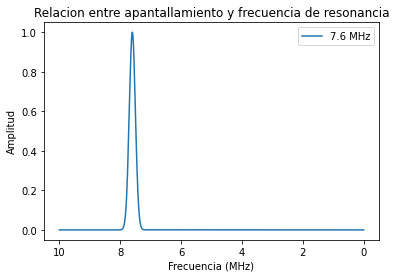

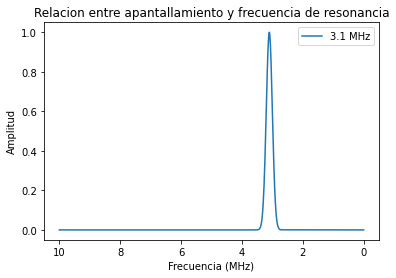

In [ ]:
#precione play e indique el apantallamiento
fre_vs_apantallamiento()

Tomando en consideracion lo visto en el grafico de tominio temporal y de fourier, ¿quien esta mas apantallado la grasa o el agua? justifique.

###**Frecuencia vs campo magnetico**

Observamos que al modificar los valores de campo magnetico algo sucede con la frecuencia de precesion, ¿cual seria su relacion, inversa o directamente proporcional? Discutan y expliquen.

In [ ]:
#precione play e indique el campo magnetico
fre_vs_cm()

NameError: ignored

###**Desplazamiento quimico vs campo magnetico**

Observamos que al modificar los valores del campo magnetico algo sucede con la frecuencia de resonancia, especificamente con el desplazamiento quimico. ¿cual seria su relacion, inversa o directamente proporcional? Discutan y expliquen.

{'a': 1, 'b': 1.5, 'c': 3}
indique el valor del campo magnetico: a


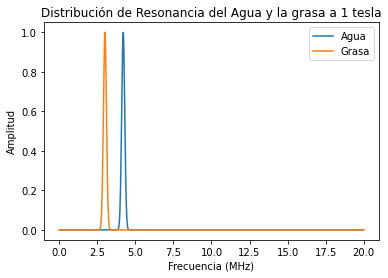

In [ ]:
#precione play e indique el campo magnetico
desplamiento_quimico_vs_cm()

##**Analisis Curvas T1 y T2, con valores libres**

###**Curva T1**

la curva T1 es una representación gráfica de la recuperación de la magnetización longitudinal (z) de un material después de ser sometido a un pulso de radiofrecuencia.

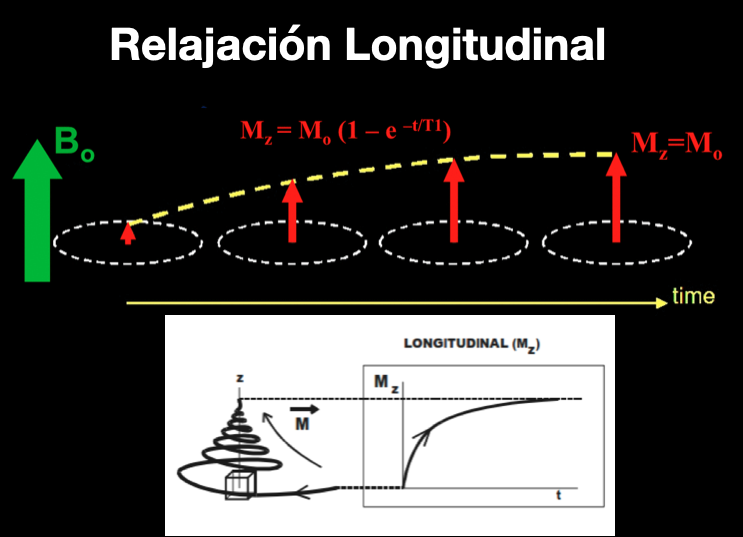

Al modificar los valores del T1 observamos cambios en la forma de la curva. Si consideramos que el T1 de un tejido corresponde a la recuperacion del 63%. ¿Los valores de t1 altos recuperan mas rapido o mas lento el 63%? Discutan y expliquen.

ingrese el T1 en ms , del tejido A: 900
ingrese el T1 en ms , del tejido B: 1000


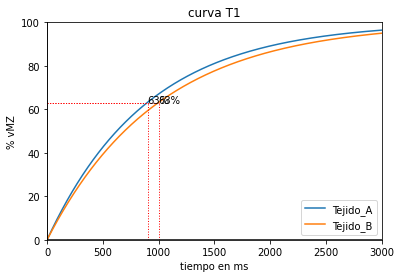

In [ ]:
#precione play e indique los valores de t1
curva_t1_libre()

###**Curva T2**

la curva T2 es una representación gráfica de la relajación transversal (x-y) de un material después de ser sometido a un pulso de radiofrecuencia.

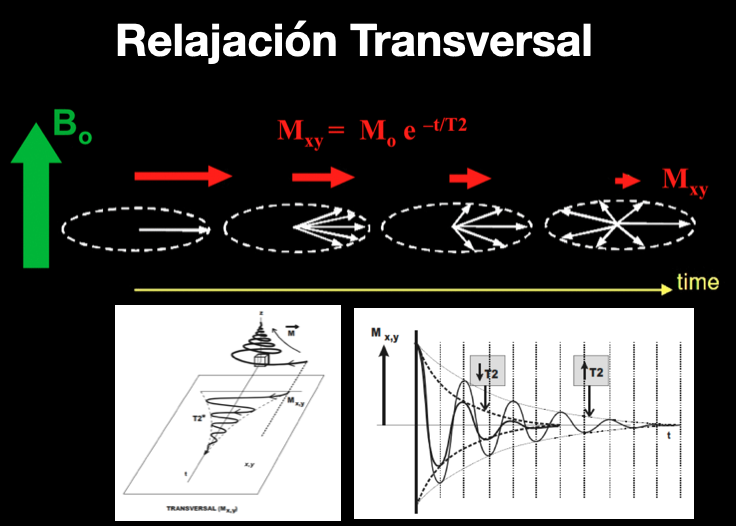

Al modificar los valores del T2 observamos cambios en la forma de la FID.
¿Que relacion existe entre la FID y el t2?

In [ ]:
#precione play e indique los valores de t2
fid_grafico_t2()

FloatSlider(value=0.5, description='T2:', max=1.0, min=0.01, step=0.01)

Output()

Al modificar los valores del T2 observamos cambios en la forma de la curva. Si consideramos que el T2 de un tejido corresponde a la recuperacion del 37%. ¿Los valores de t altos recuperan mas rapido o mas lento el 37%? Discutan y expliquen.

ingrese el T2 en ms , del tejido A: 220
ingrese el T2 en ms , del tejido B: 400


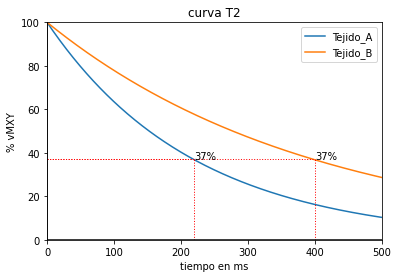

In [ ]:
#precione play e indique los valores de t2
curva_t2_libre()

##**Analisis Curvas T1 y T2 segun Tejido**

El contraste de una imagen en resonancia magentica depende mayoritariamente por el comportamiento de los tejidos tanto e su t1 y t2. Para comprender el contrase entre tejidos debemos primero entender, la razon bioquimica que explique esta diferencia entre los t1 y t2 de los tejidos. Para ello comparemos parejas. En funcion de esto, realice una una lista de orden de mayor a menor segun el t1 y t2 de cada uno de los tejidos mencionados.

In [ ]:
#precione play
print(Localizacion_Valores)
tejido_escogido_A = input("Indique el tejido A a evaluar: ")
tejido_escogido_B = input("Indique el tejido B a evaluar: ")

###**Curva T1**

In [ ]:
#precione play
curva_t1_tejido()

###**Curva T2**

In [ ]:
#precione play
curva_t2_tejido()

##**Analisis Curvas T1 y T2 segun Tejido, en 1,5T y 3T**

Vimos anteriormente que la frecuencia de precesion depende del campo magnetico, ¿sucedera lo mismo con la curva t1 y t2?. Expliquen

In [ ]:
#precione play
print(Localizacion_Valores)
tejido_escogido = input("Indique el tejido A a evaluar: ")
curva_t1_tesjale()
curva_t2_tesjale()